<span style="color:#46B4DD">Start)</span>
Loading the given data using pandas library.

In [1]:
import pandas as pd 

dataset_path = "./iris.data"
df = pd.read_csv(dataset_path, names=['sepal_length','sepal_width','petal_length','petal_width','target'])

<span style="color:#46B4DD">Q1)</span>
Checking for NaN values in each feature.

In [2]:
sepal_length_NaN = df[df['sepal_length'].isna()]
print(f"The number of missing data in sepal_length is {len(sepal_length_NaN)}.\n")
print(sepal_length_NaN)


The number of missing data in sepal_length is 2.

     sepal_length  sepal_width  petal_length  petal_width           target
73            NaN          2.2           4.5          1.5  Iris-versicolor
143           NaN          3.0           6.1          2.3   Iris-virginica


In [3]:
sepal_width_NaN = df[df['sepal_width'].isna()]
print(f"The number of missing data in sepal_width is {len(sepal_width_NaN)}.\n")
print(sepal_width_NaN)

The number of missing data in sepal_width is 0.

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []


In [4]:
petal_length_NaN = df[df['petal_length'].isna()]
print(f"The number of missing data in petal_length is {len(petal_length_NaN)}.\n")
print(petal_length_NaN)

The number of missing data in petal_length is 2.

    sepal_length  sepal_width  petal_length  petal_width           target
20           5.4          3.9           NaN          1.7      Iris-setosa
87           5.5          2.4           NaN          NaN  Iris-versicolor


In [5]:
petal_width_NaN = df[df['petal_width'].isna()]
print(f"The number of missing data in petal_width is {len(petal_width_NaN)}.\n")
print(petal_width_NaN)

The number of missing data in petal_width is 3.

    sepal_length  sepal_width  petal_length  petal_width           target
6            5.4          3.9           1.7          NaN      Iris-setosa
27           5.0          3.0           1.6          NaN      Iris-setosa
87           5.5          2.4           NaN          NaN  Iris-versicolor


In [6]:
target_NaN = df[df['target'].isna()]
print(f"The number of missing data in target is {len(target_NaN)}.\n")
print(target_NaN)

The number of missing data in target is 3.

     sepal_length  sepal_width  petal_length  petal_width target
60            6.3          3.3           4.7          1.6    NaN
139           6.2          3.4           5.4          2.0    NaN
156           6.5          3.0           5.2          2.0    NaN


<span style="color:#46B4DD">Q2)</span>
Delete the NaN values from data set.

In [7]:
df = df.dropna()
print(f"The number of missing data in sepal_length is {len(df[df['sepal_length'].isna()])}")
print(f"The number of missing data in sepal_width is {len(df[df['sepal_width'].isna()])}")
print(f"The number of missing data in petal_length is {len(df[df['petal_length'].isna()])}")
print(f"The number of missing data in petal_width is {len(df[df['petal_width'].isna()])}")
print(f"The number of missing data in target is {len(df[df['target'].isna()])}")

The number of missing data in sepal_length is 0
The number of missing data in sepal_width is 0
The number of missing data in petal_length is 0
The number of missing data in petal_width is 0
The number of missing data in target is 0


<span style="color:#46B4DD">Q3)</span>
Label Encoding

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

label_encoded_df = df.copy()

label_encoded_df['target'] = le.transform(df['target'].values)

Testing ...

In [9]:
print(f"Before using label encoding: {df['target'][0]}")
print(f"After using label encoding: {label_encoded_df['target'][0]}\n")

print(f"Before using label encoding: {df['target'][71]}")
print(f"After using label encoding: {label_encoded_df['target'][71]}\n")

print(f"Before using label encoding: {df['target'][111]}")
print(f"After using label encoding: {label_encoded_df['target'][111]}\n")

Before using label encoding: Iris-setosa
After using label encoding: 0

Before using label encoding: Iris-versicolor
After using label encoding: 1

Before using label encoding: Iris-virginica
After using label encoding: 2



<span style="color:#46B4DD">Q5)</span>
Variance and Average

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.loc[:,df.columns != 'target'])

normalized_df = label_encoded_df.copy()

normalized_df.loc[:, normalized_df.columns != 'target'] = scaler.fit_transform(df.loc[:,df.columns != 'target'])

print(df)
print(normalized_df)


     sepal_length  sepal_width  petal_length  petal_width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
153           6.7          3.0           5.2          2.3  Iris-virginica
154           6.3          2.5           5.0          1.9  Iris-virginica
155           6.5          3.0           5.2          2.0  Iris-virginica
157           6.2          3.4           5.4          2.3  Iris-virginica
158           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width  target
0       -0.900681     

In [11]:
old_mean = df.loc[:,df.columns != 'target'].mean()
old_var = df.loc[:,df.columns != 'target'].var()

new_mean = normalized_df.loc[:,normalized_df.columns != 'target'].mean()
new_var = normalized_df.loc[:,normalized_df.columns != 'target'].var()

print(f"Average before normalization:\n{old_mean}\n")
print(f"Average after normalization:\n{new_mean}\n")

print(f"Variance before normalization:\n{old_var}\n")
print(f"Variance after normalization:\n{new_var}")

Average before normalization:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

Average after normalization:
sepal_length   -4.736952e-16
sepal_width    -6.631732e-16
petal_length    3.315866e-16
petal_width    -2.842171e-16
dtype: float64

Variance before normalization:
sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

Variance after normalization:
sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
dtype: float64


<span style="color:#46B4DD">Q6)</span>
Decomposition

In [12]:
from sklearn.decomposition import PCA

reduced_features = pd.DataFrame(data = PCA(n_components=2).fit_transform(normalized_df.iloc[:, :4])  ,columns = ['First_Dimention', 'Second_Dimention'])
reduced_dfa = reduced_features.join(normalized_df[['target']], lsuffix="_left", rsuffix="_right")

reduced_dfa

,First_Dimention,Second_Dimention,target
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0
...,...,...,...
145,1.870522,0.382822,2.0
146,1.558492,-0.905314,2.0
147,1.520845,0.266795,2.0
148,1.376391,1.016362,2.0


<span style="color:#46B4DD">Q7)</span>
Plotting

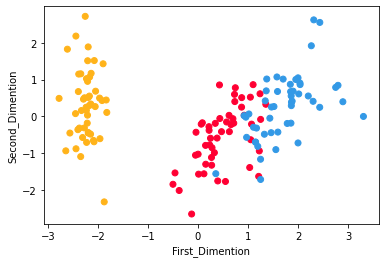

In [13]:
import matplotlib.pyplot as plt
import numpy as np

color1=(1.0, 0.7, 0.1, 1.0)
color2=(1.0, 0.0, 0.2, 1.0)
color3=(0.2, 0.6, 0.9, 1.0)
colormap = np.array([color1, color2, color3])

plt.scatter(reduced_features.values[:, 0], reduced_features.values[:, 1], c=colormap[normalized_df[['target']]])
plt.xlabel('First_Dimention')
plt.ylabel('Second_Dimention')
plt.show()




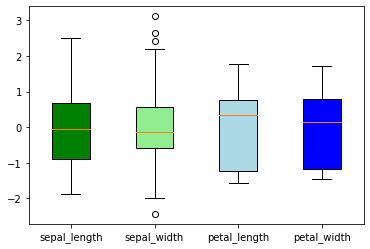

In [14]:
box = plt.boxplot(normalized_df.loc[:,df.columns != 'target'], patch_artist=True)

colors = ['green', 'lightGreen', 'lightBlue', 'blue']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2, 3, 4], ['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()